In [3]:
import pandas as pd                                       # 😀 Importa la biblioteca pandas y la renombra como pd para su uso en el código.
import matplotlib.pyplot as plt                           # 📊 Importa la biblioteca matplotlib.pyplot y la renombra como plt para su uso en el código.
import numpy as np                                        # 🔢 Importa la biblioteca numpy y la renombra como np para su uso en el código.
from keras.callbacks import ModelCheckpoint               # 💾 Importa la clase ModelCheckpoint desde keras.callbacks para guardar el modelo durante el entrenamiento.
from keras.callbacks import Callback                      # 🔄 Importa la clase Callback desde keras.callbacks para personalizar el comportamiento durante el entrenamiento.
import warnings                                           # ⚠️ Importa la biblioteca warnings para manejar advertencias.
from sklearn import preprocessing                         # 🛠️ Importa el módulo preprocessing de la biblioteca sklearn para realizar preprocesamiento de datos.
from sklearn.ensemble import RandomForestClassifier       # 🌳 Importa la clase RandomForestClassifier desde el módulo ensemble de la biblioteca sklearn para utilizar en el modelo.
from sklearn.model_selection import GridSearchCV          # 📊 Importa la clase GridSearchCV desde el módulo model_selection de la biblioteca sklearn para realizar búsqueda de hiperparámetros.
import os                                                 # 📁 Importa el módulo os para interactuar con el sistema operativo, como acceder a archivos y directorios.
from tensorflow import keras                              # 🧠 Importa el módulo keras de la biblioteca tensorflow para construir modelos de redes neuronales.
from tensorflow.keras import layers                       # 🧠 Importa el módulo layers desde keras de la biblioteca tensorflow para construir capas de red neuronal.
import shutil                                             # 📂 Importa la biblioteca shutil para realizar operaciones de manejo de archivos y directorios.
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array  # 🖼️ Importa las clases ImageDataGenerator, load_img, y img_to_array desde preprocessing.image de la biblioteca tensorflow.keras para preprocesamiento de imágenes.
from sklearn.utils import resample                        # 📊 Importa la función resample desde la biblioteca sklearn.utils para realizar remuestreo de datos.
import random                                             # 🎲 Importa la biblioteca random para generar números aleatorios.
import seaborn as sns

In [2]:
warnings.filterwarnings("ignore")
%matplotlib inline
pd.set_option('display.max_columns', None)

In [3]:
data1 = pd.read_csv('training_solutions_rev1.csv')
data2 = pd.read_csv('central_pixel_benchmark.csv')

In [4]:
data1.columns = [col.lower().replace('.', '_') for col in data1.columns]
data2.columns = [col.lower().replace('.', '_') for col in data1.columns]

In [5]:
data1
df1 = data1.copy()
data2
df2 = data2.copy()

In [6]:
df2

galaxyid  class1_1  class1_2  class1_3  class2_1  class2_2  class3_1  \
0        100018  0.468481  0.506185  0.025334  0.099844  0.406341  0.095167   
1        100037  0.468481  0.506185  0.025334  0.099844  0.406341  0.095167   
2        100042  0.408863  0.550817  0.040320  0.085001  0.465816  0.117082   
3        100052  0.322002  0.657280  0.020718  0.136922  0.520358  0.121784   
4        100056  0.468481  0.506185  0.025334  0.099844  0.406341  0.095167   
...         ...       ...       ...       ...       ...       ...       ...   
79970    999955  0.468481  0.506185  0.025334  0.099844  0.406341  0.095167   
79971    999981  0.468481  0.506185  0.025334  0.099844  0.406341  0.095167   
79972    999990  0.408863  0.550817  0.040320  0.085001  0.465816  0.117082   
79973    999994  0.322002  0.657280  0.020718  0.136922  0.520358  0.121784   
79974    999996  0.468481  0.506185  0.025334  0.099844  0.406341  0.095167   

       class3_2  class4_1  class4_2  class5_1  class5_2  class5_3  class5_4  \
0      0.311174  0.185080  0.221262  0.019015  0.157050  0.194386  0.035891   
1      0.311174  0.185080  0.221262  0.019015  0.157050  0.194386  0.035891   
2      0.348734  0.225783  0.240033  0.184419  0.181823  0.071817  0.027757   
3      0.398573  0.310370  0.209988  0.071409  0.253699  0.154043  0.041207   
4      0.311174  0.185080  0.221262  0.019015  0.157050  0.194386  0.035891   
...         ...       ...       ...       ...       ...       ...       ...   
79970  0.311174  0.185080  0.221262  0.019015  0.157050  0.194386  0.035891   
79971  0.311174  0.185080  0.221262  0.019015  0.157050  0.194386  0.035891   
79972  0.348734  0.225783  0.240033  0.184419  0.181823  0.071817  0.027757   
79973  0.398573  0.310370  0.209988  0.071409  0.253699  0.154043  0.041207   
79974  0.311174  0.185080  0.221262  0.019015  0.157050  0.194386  0.035891   

       class6_1  class6_2  class7_1  class7_2  class7_3  class8_1  class8_2  \
0      0.214295  0.785705  0.195927  0.221751  0.050803  0.038988  0.014479   
1      0.214295  0.785705  0.195927  0.221751  0.050803  0.038988  0.014479   
2      0.409452  0.590548  0.105422  0.229874  0.073566  0.010311  0.009808   
3      0.241077  0.758923  0.099912  0.157960  0.064130  0.027922  0.010894   
4      0.214295  0.785705  0.195927  0.221751  0.050803  0.038988  0.014479   
...         ...       ...       ...       ...       ...       ...       ...   
79970  0.214295  0.785705  0.195927  0.221751  0.050803  0.038988  0.014479   
79971  0.214295  0.785705  0.195927  0.221751  0.050803  0.038988  0.014479   
79972  0.409452  0.590548  0.105422  0.229874  0.073566  0.010311  0.009808   
79973  0.241077  0.758923  0.099912  0.157960  0.064130  0.027922  0.010894   
79974  0.214295  0.785705  0.195927  0.221751  0.050803  0.038988  0.014479   

       class8_3  class8_4  class8_5  class8_6  class8_7  class9_1  class9_2  \
0      0.027519  0.023837  0.063031  0.043247  0.003193  0.066032  0.010392   
1      0.027519  0.023837  0.063031  0.043247  0.003193  0.066032  0.010392   
2      0.058676  0.186017  0.100604  0.040094  0.003943  0.024751  0.005740   
3      0.042537  0.054149  0.060039  0.039436  0.006099  0.065605  0.013076   
4      0.027519  0.023837  0.063031  0.043247  0.003193  0.066032  0.010392   
...         ...       ...       ...       ...       ...       ...       ...   
79970  0.027519  0.023837  0.063031  0.043247  0.003193  0.066032  0.010392   
79971  0.027519  0.023837  0.063031  0.043247  0.003193  0.066032  0.010392   
79972  0.058676  0.186017  0.100604  0.040094  0.003943  0.024751  0.005740   
79973  0.042537  0.054149  0.060039  0.039436  0.006099  0.065605  0.013076   
79974  0.027519  0.023837  0.063031  0.043247  0.003193  0.066032  0.010392   

       class9_3  class10_1  class10_2  class10_3  class11_1  class11_2  \
0      0.023420   0.082314   0.071253   0.031512   0.012281   0.079964   
1      0.023420   0.082314   0.071253   0.031512   0.012281   0

In [7]:
df1

galaxyid  class1_1  class1_2  class1_3  class2_1  class2_2  class3_1  \
0        100008  0.383147  0.616853  0.000000  0.000000  0.616853  0.038452   
1        100023  0.327001  0.663777  0.009222  0.031178  0.632599  0.467370   
2        100053  0.765717  0.177352  0.056931  0.000000  0.177352  0.000000   
3        100078  0.693377  0.238564  0.068059  0.000000  0.238564  0.109493   
4        100090  0.933839  0.000000  0.066161  0.000000  0.000000  0.000000   
...         ...       ...       ...       ...       ...       ...       ...   
61573    999948  0.510379  0.489621  0.000000  0.059207  0.430414  0.000000   
61574    999950  0.901216  0.098784  0.000000  0.000000  0.098784  0.000000   
61575    999958  0.202841  0.777376  0.019783  0.116962  0.660414  0.067245   
61576    999964  0.091000  0.909000  0.000000  0.045450  0.863550  0.022452   
61577    999967  0.767000  0.140000  0.093000  0.000000  0.140000  0.000000   

       class3_2  class4_1  class4_2  class5_1  class5_2  class5_3  class5_4  \
0      0.578401  0.418398  0.198455  0.000000  0.104752  0.512101  0.000000   
1      0.165229  0.591328  0.041271  0.000000  0.236781  0.160941  0.234877   
2      0.177352  0.000000  0.177352  0.000000  0.117790  0.059562  0.000000   
3      0.129071  0.189098  0.049466  0.000000  0.000000  0.113284  0.125280   
4      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
...         ...       ...       ...       ...       ...       ...       ...   
61573  0.430414  0.226257  0.204157  0.043458  0.260804  0.000000  0.126152   
61574  0.098784  0.000000  0.098784  0.000000  0.045378  0.053406  0.000000   
61575  0.593168  0.140022  0.520391  0.000000  0.257128  0.347328  0.055958   
61576  0.841098  0.795330  0.068220  0.000000  0.227114  0.545764  0.090673   
61577  0.140000  0.023380  0.116620  0.000000  0.046620  0.070000  0.023380   

       class6_1  class6_2  class7_1  class7_2  class7_3  class8_1  class8_2  \
0      0.054453  0.945547  0.201463  0.181684  0.000000   0.00000  0.027227   
1      0.189149  0.810851  0.000000  0.135082  0.191919   0.00000  0.000000   
2      0.000000  1.000000  0.000000  0.741864  0.023853   0.00000  0.000000   
3      0.320398  0.679602  0.408599  0.284778  0.000000   0.00000  0.000000   
4      0.029383  0.970617  0.494587  0.439252  0.000000   0.00000  0.000000   
...         ...       ...       ...       ...       ...       ...       ...   
61573  0.245734  0.754266  0.000000  0.410816  0.099563   0.03514  0.000000   
61574  0.127644  0.872356  0.404841  0.496375  0.000000   0.00000  0.000000   
61575  0.839186  0.160814  0.030477  0.172364  0.000000   0.00000  0.000000   
61576  0.864000  0.136000  0.045500  0.045500  0.000000   0.09072  0.000000   
61577  0.333000  0.667000  0.069797  0.674193  0.023010   0.00000  0.025641   

       class8_3  class8_4  class8_5  class8_6  class8_7  class9_1  class9_2  \
0      0.000000  0.027227  0.000000  0.000000  0.000000  0.000000       0.0   
1      0.140353  0.000000  0.048796  0.000000  0.000000  0.012414       0.0   
2      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000       0.0   
3      0.096119  0.096119  0.000000  0.128159  0.000000  0.000000       0.0   
4      0.000000  0.000000  0.000000  0.029383  0.000000  0.000000       0.0   
...         ...       ...       ...       ...       ...       ...       ...   
61573  0.000000  0.000000  0.175454  0.035140  0.000000  0.059207       0.0   
61574  0.021321  0.000000  0.062095  0.044229  0.000000  0.000000       0.0   
61575  0.033567  0.134270  0.067135  0.604214  0.000000  0.116962       0.0   
61576  0.090720  0.136512  0.045792  0.500256  0.000000  0.045450       0.0   
61577  0.204795  0.025641  0.051282  0.000000  0.025641  0.000000       0.0   

       class9_3  class10_1  class10_2  class10_3  class11_1  class11_2  \
0      0.000000   0.279952   0.138445   0.000000   0.000000   0.092886   
1      0.018764   0.000000   0.131378   0.459950   0.000000   0

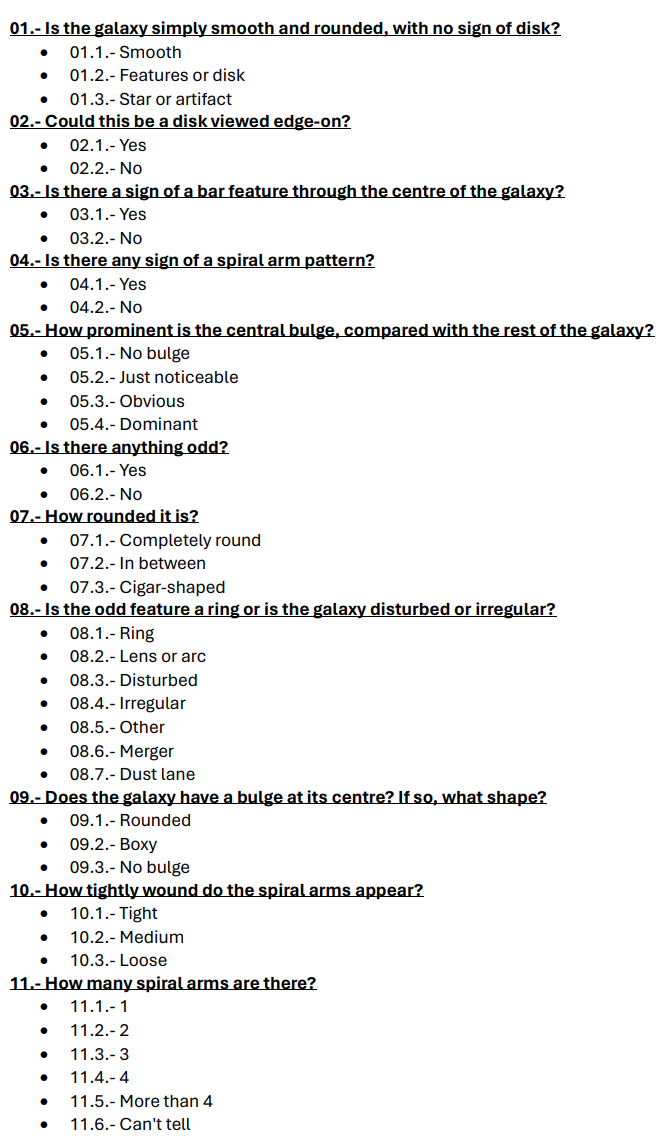

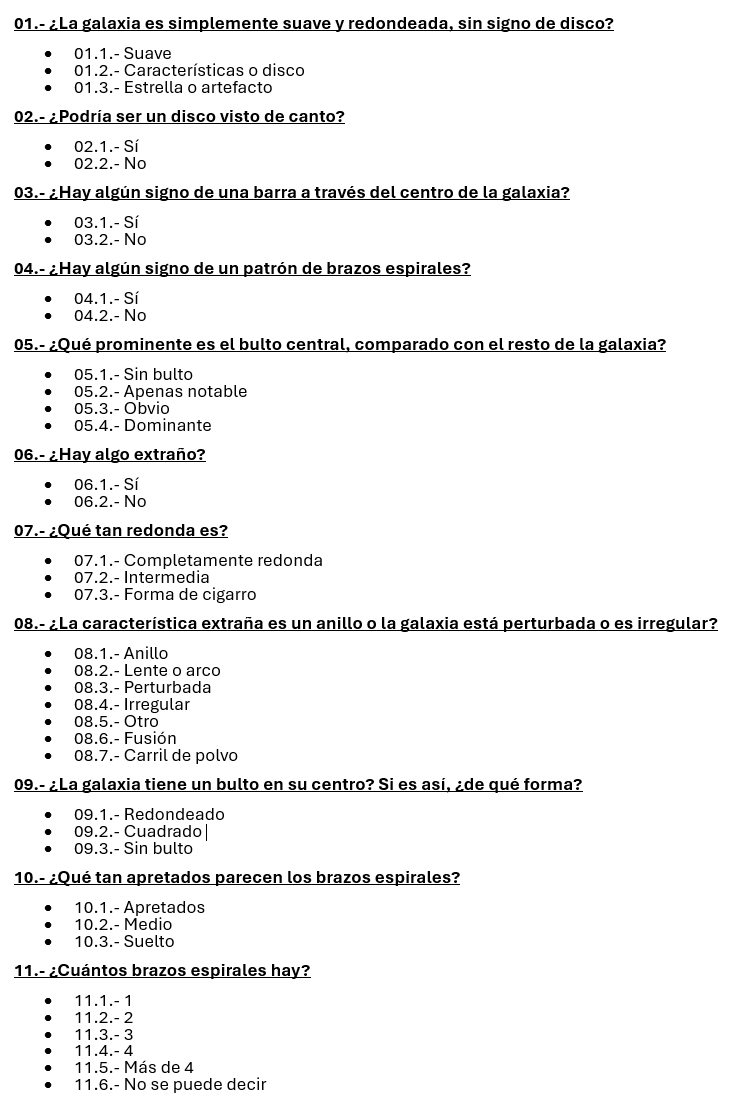

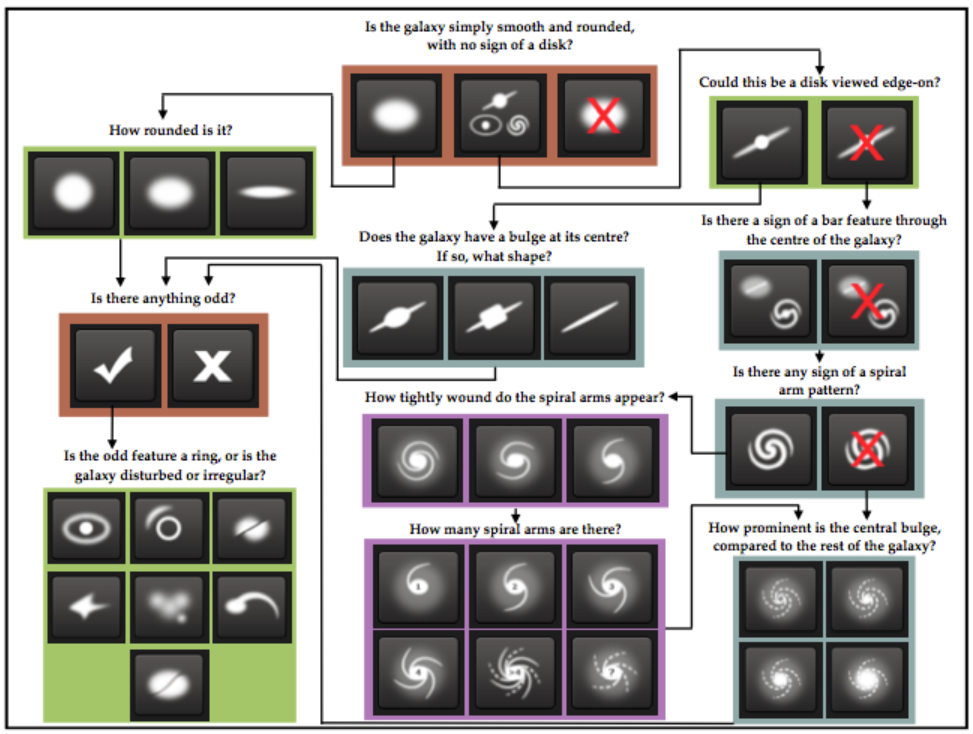

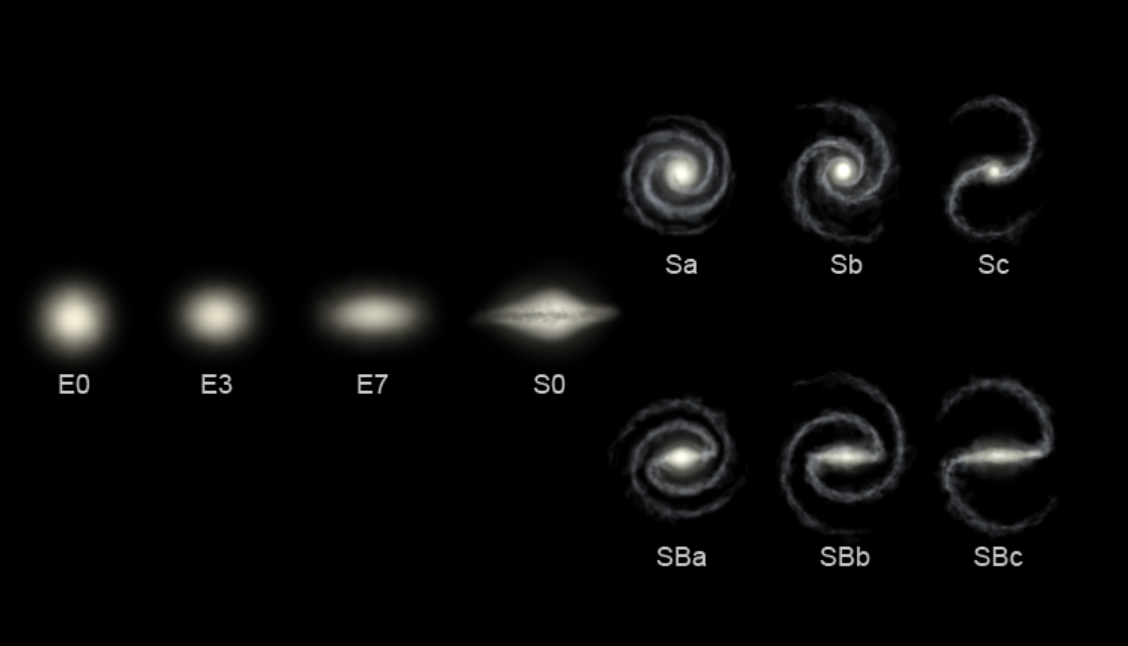

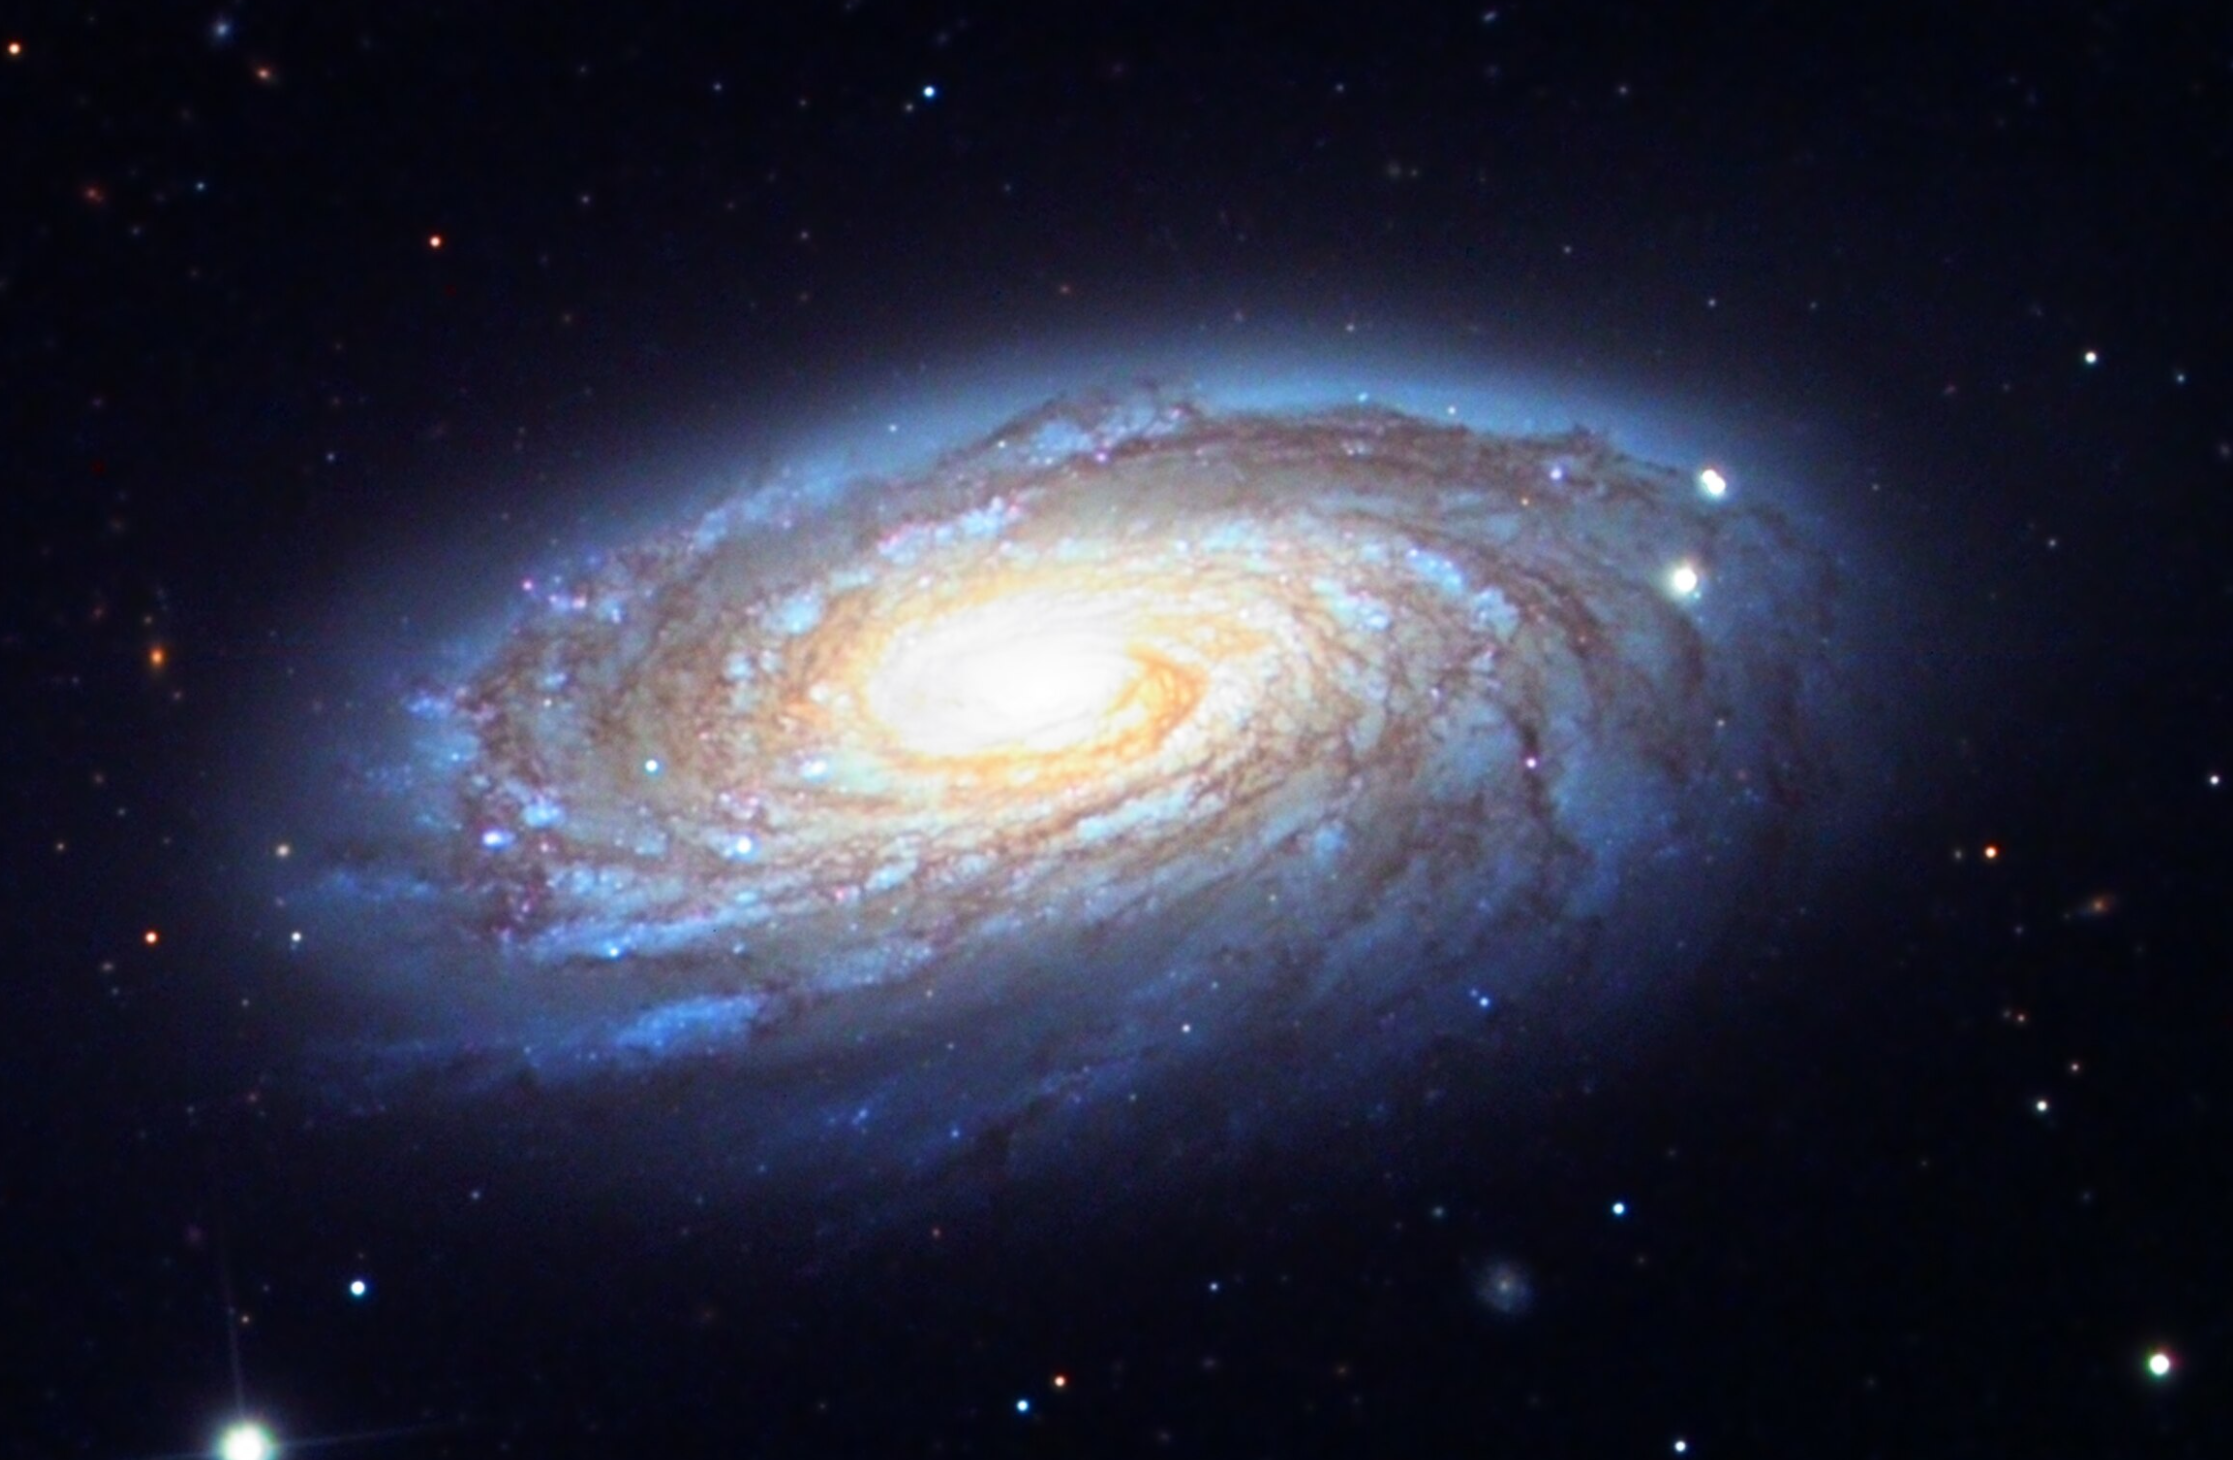

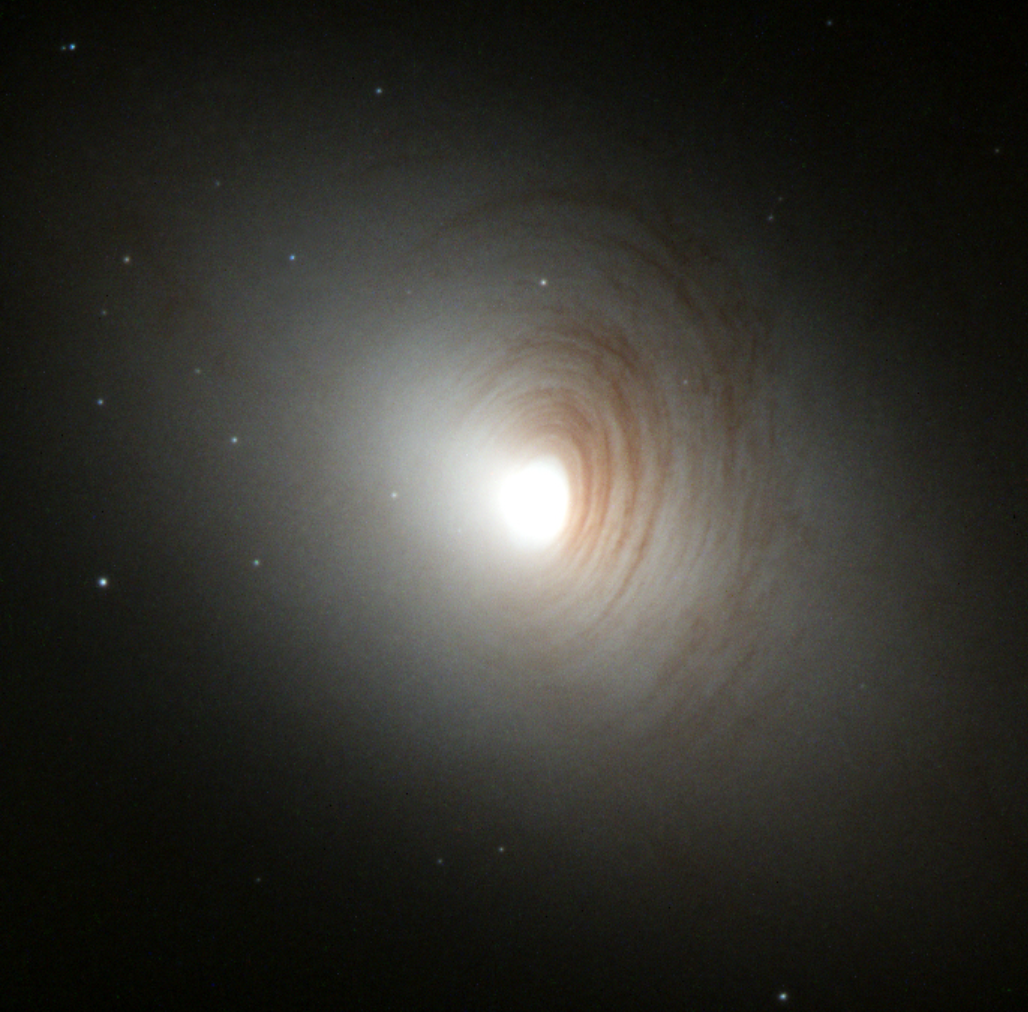

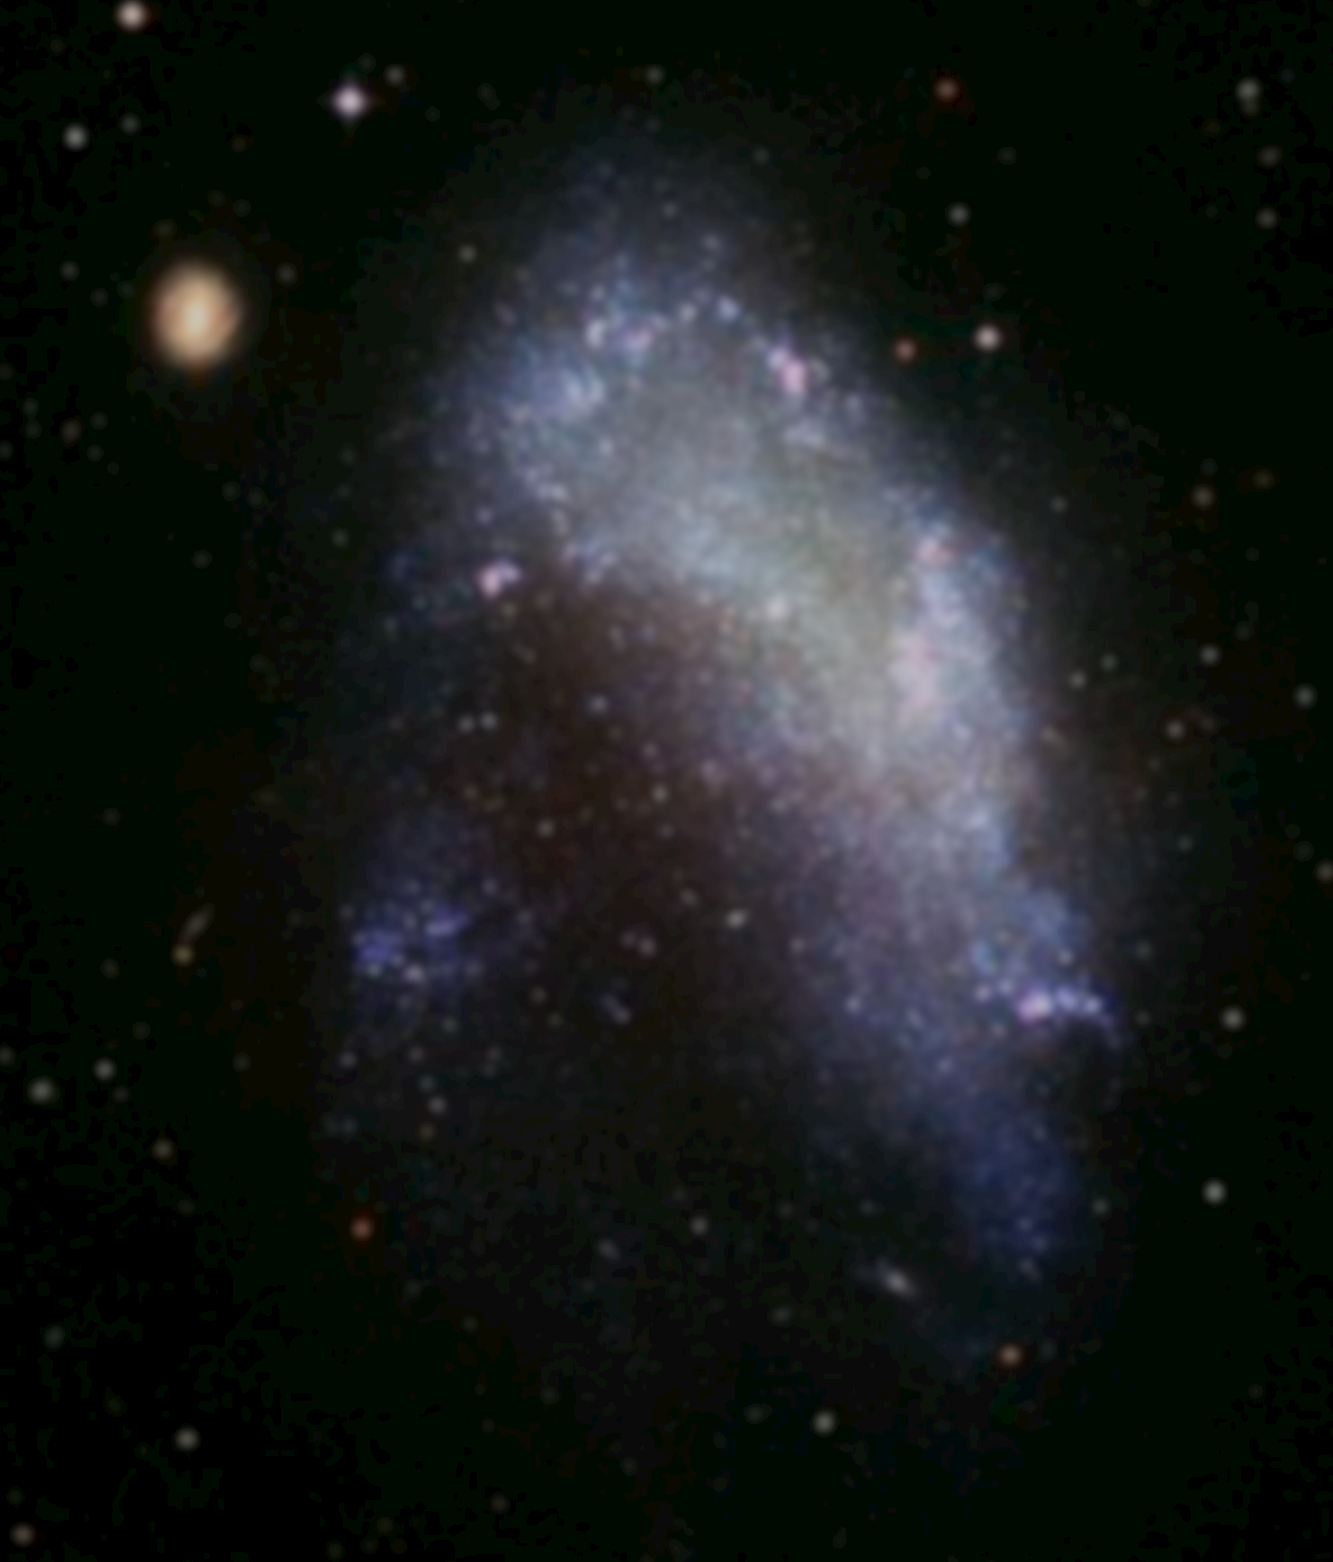

In [7]:
testimages_dir_path = "C:/Users/axier/LABS/FINAL_PROYECT/IMAGES/images_test_rev1"
trainimages_dir_path = "C:/Users/axier/LABS/FINAL_PROYECT/IMAGES/images_training_rev1"

In [9]:
df1_1 = df1[df1['class1_3'] > df1[['class1_1', 'class1_2']].max(axis=1)]['galaxyid']
df1_2 = df1[df1['class1_1'] > df1[['class1_2', 'class1_3']].max(axis=1)]
df1_2 = df1_2[df1_2['class6_1'] > df1_2['class6_2']]
df1_3 = df1_2[(df1_2['class8_3'] > df1_2[['class8_1', 'class8_2', 'class8_5', 'class8_6', 'class8_7']].max(axis=1))]['galaxyid'] 
df1_4 = df1_2[(df1_2['class8_4'] > df1_2[['class8_1', 'class8_2', 'class8_5', 'class8_6', 'class8_7']].max(axis=1))]['galaxyid']

In [10]:
unstructured = pd.concat([df1_1, df1_3,df1_4])
unstructured

1791     126783
2376     135453
6957     202788
7434     209411
7557     211113
          ...  
60205    979903
60921    989942
61005    991011
61115    992850
61237    994929
Name: galaxyid, Length: 393, dtype: int64

In [11]:
unstructured.duplicated().sum()

62

In [12]:
unstructured = unstructured.drop_duplicates()
unstructured.shape

(331,)

In [13]:
unstructured_set = set(unstructured)
all_galaxyid = set(df1['galaxyid'])
structured = all_galaxyid - unstructured_set
print(len(structured))

61247


In [5]:
data = {"Galaxy Type": ["structured", "no_structured"], "Count": [61247, 62]}
df = pd.DataFrame(data)
print(df)

     Galaxy Type  Count
0     structured  61247
1  no_structured     62


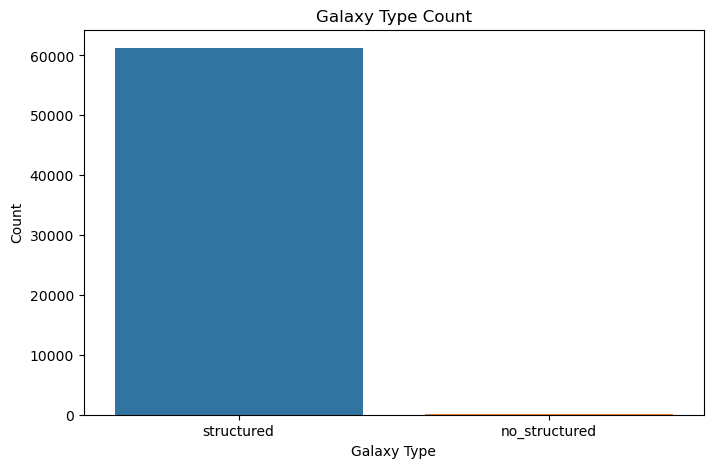

In [7]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Galaxy Type', y='Count', data=df)
plt.title('Galaxy Type Count')
plt.show()

In [14]:
type(structured)

set

In [8]:
train_no_structured_dir_path = "C:/Users/axier/LABS/FINAL_PROYECT/IMAGES/TRAINNING_BI/no_structured"
train_structured_dir_path = "C:/Users/axier/LABS/FINAL_PROYECT/IMAGES/TRAINNING_BI/structured"

In [16]:
for index in unstructured:
    image_path = os.path.join(trainimages_dir_path, f"{index}.jpg")
    
    # Verificar si el archivo de imagen existe
    if os.path.exists(image_path):
        # Copiar la imagen al directorio unstructured_dir_path
        shutil.copy(image_path, train_no_structured_dir_path)
        print(f"Imagen {index}.jpg copiada con éxito.")
    else:
        print(f"La imagen {index}.jpg no se encuentra en el directorio de imágenes.")

Imagen 126783.jpg copiada con éxito.
Imagen 135453.jpg copiada con éxito.
Imagen 202788.jpg copiada con éxito.
Imagen 209411.jpg copiada con éxito.
Imagen 211113.jpg copiada con éxito.
Imagen 223904.jpg copiada con éxito.
Imagen 227890.jpg copiada con éxito.
Imagen 256411.jpg copiada con éxito.
Imagen 256893.jpg copiada con éxito.
Imagen 284451.jpg copiada con éxito.
Imagen 293836.jpg copiada con éxito.
Imagen 320852.jpg copiada con éxito.
Imagen 345209.jpg copiada con éxito.
Imagen 356310.jpg copiada con éxito.
Imagen 357133.jpg copiada con éxito.
Imagen 373941.jpg copiada con éxito.
Imagen 376334.jpg copiada con éxito.
Imagen 406866.jpg copiada con éxito.
Imagen 437063.jpg copiada con éxito.
Imagen 448708.jpg copiada con éxito.
Imagen 483706.jpg copiada con éxito.
Imagen 496080.jpg copiada con éxito.
Imagen 515600.jpg copiada con éxito.
Imagen 515861.jpg copiada con éxito.
Imagen 516309.jpg copiada con éxito.
Imagen 528143.jpg copiada con éxito.
Imagen 584391.jpg copiada con éxito.
I

Imagen 300284.jpg copiada con éxito.
Imagen 308589.jpg copiada con éxito.
Imagen 309902.jpg copiada con éxito.
Imagen 313915.jpg copiada con éxito.
Imagen 332129.jpg copiada con éxito.
Imagen 344009.jpg copiada con éxito.
Imagen 352872.jpg copiada con éxito.
Imagen 358125.jpg copiada con éxito.
Imagen 363009.jpg copiada con éxito.
Imagen 365449.jpg copiada con éxito.
Imagen 376804.jpg copiada con éxito.
Imagen 395456.jpg copiada con éxito.
Imagen 398485.jpg copiada con éxito.
Imagen 403140.jpg copiada con éxito.
Imagen 404771.jpg copiada con éxito.
Imagen 411283.jpg copiada con éxito.
Imagen 418591.jpg copiada con éxito.
Imagen 425114.jpg copiada con éxito.
Imagen 432666.jpg copiada con éxito.
Imagen 435062.jpg copiada con éxito.
Imagen 460580.jpg copiada con éxito.
Imagen 465384.jpg copiada con éxito.
Imagen 466311.jpg copiada con éxito.
Imagen 467050.jpg copiada con éxito.
Imagen 470283.jpg copiada con éxito.
Imagen 475033.jpg copiada con éxito.
Imagen 497170.jpg copiada con éxito.
I

In [17]:
claves_estructuradas = list(structured)
indices_aleatorios = random.sample(claves_estructuradas, 3310)

# Iterar sobre los índices aleatorios
for index in indices_aleatorios:
    image_path = os.path.join(trainimages_dir_path, f"{index}.jpg")
    
    # Verificar si el archivo de imagen existe
    if os.path.exists(image_path):
        # Copiar la imagen al directorio unstructured_dir_path
        shutil.copy(image_path, train_structured_dir_path)
        print(f"Imagen {index}.jpg copiada con éxito.")
    else:
        print(f"La imagen {index}.jpg no se encuentra en el directorio de imágenes.")

Imagen 264893.jpg copiada con éxito.
Imagen 258298.jpg copiada con éxito.
Imagen 933122.jpg copiada con éxito.
Imagen 350242.jpg copiada con éxito.
Imagen 660719.jpg copiada con éxito.
Imagen 550155.jpg copiada con éxito.
Imagen 482257.jpg copiada con éxito.
Imagen 412737.jpg copiada con éxito.
Imagen 690522.jpg copiada con éxito.
Imagen 107268.jpg copiada con éxito.
Imagen 410794.jpg copiada con éxito.
Imagen 898427.jpg copiada con éxito.
Imagen 155041.jpg copiada con éxito.
Imagen 126321.jpg copiada con éxito.
Imagen 274654.jpg copiada con éxito.
Imagen 135734.jpg copiada con éxito.
Imagen 706650.jpg copiada con éxito.
Imagen 337750.jpg copiada con éxito.
Imagen 378401.jpg copiada con éxito.
Imagen 338131.jpg copiada con éxito.
Imagen 445632.jpg copiada con éxito.
Imagen 642822.jpg copiada con éxito.
Imagen 288227.jpg copiada con éxito.
Imagen 553409.jpg copiada con éxito.
Imagen 374029.jpg copiada con éxito.
Imagen 967330.jpg copiada con éxito.
Imagen 167613.jpg copiada con éxito.
I

Imagen 586447.jpg copiada con éxito.
Imagen 258062.jpg copiada con éxito.
Imagen 485585.jpg copiada con éxito.
Imagen 961628.jpg copiada con éxito.
Imagen 911092.jpg copiada con éxito.
Imagen 283713.jpg copiada con éxito.
Imagen 201809.jpg copiada con éxito.
Imagen 588448.jpg copiada con éxito.
Imagen 153858.jpg copiada con éxito.
Imagen 781659.jpg copiada con éxito.
Imagen 110821.jpg copiada con éxito.
Imagen 893560.jpg copiada con éxito.
Imagen 737100.jpg copiada con éxito.
Imagen 744749.jpg copiada con éxito.
Imagen 705670.jpg copiada con éxito.
Imagen 414216.jpg copiada con éxito.
Imagen 527037.jpg copiada con éxito.
Imagen 742290.jpg copiada con éxito.
Imagen 423725.jpg copiada con éxito.
Imagen 129501.jpg copiada con éxito.
Imagen 951772.jpg copiada con éxito.
Imagen 176959.jpg copiada con éxito.
Imagen 563186.jpg copiada con éxito.
Imagen 556977.jpg copiada con éxito.
Imagen 420741.jpg copiada con éxito.
Imagen 718226.jpg copiada con éxito.
Imagen 361884.jpg copiada con éxito.
I

Imagen 387302.jpg copiada con éxito.
Imagen 945882.jpg copiada con éxito.
Imagen 161930.jpg copiada con éxito.
Imagen 573583.jpg copiada con éxito.
Imagen 759462.jpg copiada con éxito.
Imagen 763064.jpg copiada con éxito.
Imagen 809654.jpg copiada con éxito.
Imagen 708201.jpg copiada con éxito.
Imagen 237197.jpg copiada con éxito.
Imagen 282006.jpg copiada con éxito.
Imagen 524167.jpg copiada con éxito.
Imagen 628846.jpg copiada con éxito.
Imagen 554126.jpg copiada con éxito.
Imagen 118700.jpg copiada con éxito.
Imagen 200410.jpg copiada con éxito.
Imagen 945417.jpg copiada con éxito.
Imagen 843477.jpg copiada con éxito.
Imagen 873944.jpg copiada con éxito.
Imagen 669374.jpg copiada con éxito.
Imagen 192527.jpg copiada con éxito.
Imagen 928702.jpg copiada con éxito.
Imagen 661027.jpg copiada con éxito.
Imagen 638059.jpg copiada con éxito.
Imagen 427732.jpg copiada con éxito.
Imagen 885257.jpg copiada con éxito.
Imagen 446037.jpg copiada con éxito.
Imagen 812497.jpg copiada con éxito.
I

Imagen 843857.jpg copiada con éxito.
Imagen 784244.jpg copiada con éxito.
Imagen 310551.jpg copiada con éxito.
Imagen 701831.jpg copiada con éxito.
Imagen 782252.jpg copiada con éxito.
Imagen 952926.jpg copiada con éxito.
Imagen 300735.jpg copiada con éxito.
Imagen 605623.jpg copiada con éxito.
Imagen 211269.jpg copiada con éxito.
Imagen 702180.jpg copiada con éxito.
Imagen 661510.jpg copiada con éxito.
Imagen 239831.jpg copiada con éxito.
Imagen 920815.jpg copiada con éxito.
Imagen 416634.jpg copiada con éxito.
Imagen 150004.jpg copiada con éxito.
Imagen 479368.jpg copiada con éxito.
Imagen 875127.jpg copiada con éxito.
Imagen 493737.jpg copiada con éxito.
Imagen 738724.jpg copiada con éxito.
Imagen 697014.jpg copiada con éxito.
Imagen 806357.jpg copiada con éxito.
Imagen 808619.jpg copiada con éxito.
Imagen 147319.jpg copiada con éxito.
Imagen 850339.jpg copiada con éxito.
Imagen 288871.jpg copiada con éxito.
Imagen 736112.jpg copiada con éxito.
Imagen 408507.jpg copiada con éxito.
I

Imagen 687748.jpg copiada con éxito.
Imagen 155865.jpg copiada con éxito.
Imagen 708002.jpg copiada con éxito.
Imagen 673777.jpg copiada con éxito.
Imagen 374378.jpg copiada con éxito.
Imagen 247582.jpg copiada con éxito.
Imagen 121031.jpg copiada con éxito.
Imagen 775788.jpg copiada con éxito.
Imagen 191762.jpg copiada con éxito.
Imagen 776385.jpg copiada con éxito.
Imagen 749532.jpg copiada con éxito.
Imagen 822230.jpg copiada con éxito.
Imagen 259294.jpg copiada con éxito.
Imagen 643068.jpg copiada con éxito.
Imagen 544054.jpg copiada con éxito.
Imagen 330328.jpg copiada con éxito.
Imagen 643861.jpg copiada con éxito.
Imagen 780503.jpg copiada con éxito.
Imagen 710934.jpg copiada con éxito.
Imagen 309184.jpg copiada con éxito.
Imagen 698654.jpg copiada con éxito.
Imagen 947660.jpg copiada con éxito.
Imagen 581778.jpg copiada con éxito.
Imagen 409848.jpg copiada con éxito.
Imagen 749725.jpg copiada con éxito.
Imagen 886671.jpg copiada con éxito.
Imagen 631623.jpg copiada con éxito.
I

Imagen 401959.jpg copiada con éxito.
Imagen 938670.jpg copiada con éxito.
Imagen 600021.jpg copiada con éxito.
Imagen 100727.jpg copiada con éxito.
Imagen 828441.jpg copiada con éxito.
Imagen 419290.jpg copiada con éxito.
Imagen 296184.jpg copiada con éxito.
Imagen 836870.jpg copiada con éxito.
Imagen 336133.jpg copiada con éxito.
Imagen 599327.jpg copiada con éxito.
Imagen 790026.jpg copiada con éxito.
Imagen 443470.jpg copiada con éxito.
Imagen 506705.jpg copiada con éxito.
Imagen 944229.jpg copiada con éxito.
Imagen 224412.jpg copiada con éxito.
Imagen 653483.jpg copiada con éxito.
Imagen 244224.jpg copiada con éxito.
Imagen 274847.jpg copiada con éxito.
Imagen 636735.jpg copiada con éxito.
Imagen 351769.jpg copiada con éxito.
Imagen 843555.jpg copiada con éxito.
Imagen 249907.jpg copiada con éxito.
Imagen 444163.jpg copiada con éxito.
Imagen 774077.jpg copiada con éxito.
Imagen 771342.jpg copiada con éxito.
Imagen 113509.jpg copiada con éxito.
Imagen 365412.jpg copiada con éxito.
I

Imagen 348350.jpg copiada con éxito.
Imagen 689714.jpg copiada con éxito.
Imagen 179616.jpg copiada con éxito.
Imagen 716520.jpg copiada con éxito.
Imagen 769141.jpg copiada con éxito.
Imagen 525075.jpg copiada con éxito.
Imagen 266113.jpg copiada con éxito.
Imagen 791470.jpg copiada con éxito.
Imagen 917671.jpg copiada con éxito.
Imagen 654303.jpg copiada con éxito.
Imagen 743644.jpg copiada con éxito.
Imagen 641643.jpg copiada con éxito.
Imagen 382381.jpg copiada con éxito.
Imagen 388496.jpg copiada con éxito.
Imagen 386200.jpg copiada con éxito.
Imagen 577829.jpg copiada con éxito.
Imagen 261537.jpg copiada con éxito.
Imagen 738576.jpg copiada con éxito.
Imagen 221996.jpg copiada con éxito.
Imagen 470334.jpg copiada con éxito.
Imagen 390603.jpg copiada con éxito.
Imagen 972926.jpg copiada con éxito.
Imagen 139008.jpg copiada con éxito.
Imagen 518592.jpg copiada con éxito.
Imagen 577194.jpg copiada con éxito.
Imagen 392818.jpg copiada con éxito.
Imagen 809884.jpg copiada con éxito.
I

Imagen 301085.jpg copiada con éxito.
Imagen 850818.jpg copiada con éxito.
Imagen 328586.jpg copiada con éxito.
Imagen 755943.jpg copiada con éxito.
Imagen 940666.jpg copiada con éxito.
Imagen 341743.jpg copiada con éxito.
Imagen 827657.jpg copiada con éxito.
Imagen 877015.jpg copiada con éxito.
Imagen 403362.jpg copiada con éxito.
Imagen 485534.jpg copiada con éxito.
Imagen 934539.jpg copiada con éxito.
Imagen 126304.jpg copiada con éxito.
Imagen 507765.jpg copiada con éxito.
Imagen 542796.jpg copiada con éxito.
Imagen 892382.jpg copiada con éxito.
Imagen 779368.jpg copiada con éxito.
Imagen 165588.jpg copiada con éxito.
Imagen 780006.jpg copiada con éxito.
Imagen 693814.jpg copiada con éxito.
Imagen 266898.jpg copiada con éxito.
Imagen 982157.jpg copiada con éxito.
Imagen 295563.jpg copiada con éxito.
Imagen 517395.jpg copiada con éxito.
Imagen 296561.jpg copiada con éxito.
Imagen 736759.jpg copiada con éxito.
Imagen 604587.jpg copiada con éxito.
Imagen 213239.jpg copiada con éxito.
I

Imagen 646810.jpg copiada con éxito.
Imagen 647048.jpg copiada con éxito.
Imagen 855099.jpg copiada con éxito.
Imagen 416131.jpg copiada con éxito.
Imagen 986672.jpg copiada con éxito.
Imagen 700637.jpg copiada con éxito.
Imagen 783923.jpg copiada con éxito.
Imagen 286679.jpg copiada con éxito.
Imagen 792165.jpg copiada con éxito.
Imagen 208805.jpg copiada con éxito.
Imagen 190212.jpg copiada con éxito.
Imagen 612889.jpg copiada con éxito.
Imagen 624005.jpg copiada con éxito.
Imagen 916908.jpg copiada con éxito.
Imagen 849409.jpg copiada con éxito.
Imagen 416602.jpg copiada con éxito.
Imagen 486645.jpg copiada con éxito.
Imagen 350557.jpg copiada con éxito.
Imagen 944069.jpg copiada con éxito.
Imagen 553778.jpg copiada con éxito.
Imagen 719201.jpg copiada con éxito.
Imagen 682982.jpg copiada con éxito.
Imagen 942859.jpg copiada con éxito.
Imagen 840628.jpg copiada con éxito.
Imagen 279149.jpg copiada con éxito.
Imagen 459611.jpg copiada con éxito.
Imagen 882432.jpg copiada con éxito.
I

Imagen 213718.jpg copiada con éxito.
Imagen 314328.jpg copiada con éxito.
Imagen 193264.jpg copiada con éxito.
Imagen 137253.jpg copiada con éxito.
Imagen 742164.jpg copiada con éxito.
Imagen 431605.jpg copiada con éxito.
Imagen 236908.jpg copiada con éxito.
Imagen 507347.jpg copiada con éxito.
Imagen 546615.jpg copiada con éxito.
Imagen 134289.jpg copiada con éxito.
Imagen 338150.jpg copiada con éxito.
Imagen 505480.jpg copiada con éxito.
Imagen 755156.jpg copiada con éxito.
Imagen 667502.jpg copiada con éxito.
Imagen 627027.jpg copiada con éxito.
Imagen 534074.jpg copiada con éxito.
Imagen 254269.jpg copiada con éxito.
Imagen 314335.jpg copiada con éxito.
Imagen 487806.jpg copiada con éxito.
Imagen 741604.jpg copiada con éxito.
Imagen 136823.jpg copiada con éxito.
Imagen 284932.jpg copiada con éxito.
Imagen 446509.jpg copiada con éxito.
Imagen 765190.jpg copiada con éxito.
Imagen 827285.jpg copiada con éxito.
Imagen 502151.jpg copiada con éxito.
Imagen 400739.jpg copiada con éxito.
I

Imagen 315760.jpg copiada con éxito.
Imagen 553611.jpg copiada con éxito.
Imagen 970642.jpg copiada con éxito.
Imagen 934130.jpg copiada con éxito.
Imagen 261482.jpg copiada con éxito.
Imagen 819065.jpg copiada con éxito.
Imagen 204050.jpg copiada con éxito.
Imagen 709046.jpg copiada con éxito.
Imagen 865967.jpg copiada con éxito.
Imagen 248228.jpg copiada con éxito.
Imagen 309559.jpg copiada con éxito.
Imagen 724150.jpg copiada con éxito.
Imagen 912682.jpg copiada con éxito.
Imagen 791592.jpg copiada con éxito.
Imagen 630747.jpg copiada con éxito.
Imagen 203275.jpg copiada con éxito.
Imagen 812132.jpg copiada con éxito.
Imagen 744441.jpg copiada con éxito.
Imagen 841164.jpg copiada con éxito.
Imagen 853003.jpg copiada con éxito.
Imagen 820739.jpg copiada con éxito.
Imagen 393405.jpg copiada con éxito.
Imagen 339311.jpg copiada con éxito.
Imagen 395013.jpg copiada con éxito.
Imagen 907911.jpg copiada con éxito.
Imagen 206624.jpg copiada con éxito.
Imagen 300502.jpg copiada con éxito.
I

Imagen 520092.jpg copiada con éxito.
Imagen 286197.jpg copiada con éxito.
Imagen 824483.jpg copiada con éxito.
Imagen 434093.jpg copiada con éxito.
Imagen 849661.jpg copiada con éxito.
Imagen 956175.jpg copiada con éxito.
Imagen 422329.jpg copiada con éxito.
Imagen 678229.jpg copiada con éxito.
Imagen 455354.jpg copiada con éxito.
Imagen 152282.jpg copiada con éxito.
Imagen 893799.jpg copiada con éxito.
Imagen 741489.jpg copiada con éxito.
Imagen 554031.jpg copiada con éxito.
Imagen 965150.jpg copiada con éxito.
Imagen 492224.jpg copiada con éxito.
Imagen 791565.jpg copiada con éxito.
Imagen 568428.jpg copiada con éxito.
Imagen 172932.jpg copiada con éxito.
Imagen 575590.jpg copiada con éxito.
Imagen 612094.jpg copiada con éxito.
Imagen 209681.jpg copiada con éxito.
Imagen 355258.jpg copiada con éxito.
Imagen 470582.jpg copiada con éxito.
Imagen 629479.jpg copiada con éxito.
Imagen 536862.jpg copiada con éxito.
Imagen 627293.jpg copiada con éxito.
Imagen 341125.jpg copiada con éxito.
I

Imagen 626251.jpg copiada con éxito.
Imagen 162864.jpg copiada con éxito.
Imagen 752821.jpg copiada con éxito.
Imagen 878676.jpg copiada con éxito.
Imagen 859379.jpg copiada con éxito.
Imagen 879329.jpg copiada con éxito.
Imagen 554104.jpg copiada con éxito.
Imagen 170340.jpg copiada con éxito.
Imagen 322105.jpg copiada con éxito.
Imagen 219624.jpg copiada con éxito.
Imagen 681799.jpg copiada con éxito.
Imagen 298971.jpg copiada con éxito.
Imagen 363522.jpg copiada con éxito.
Imagen 253934.jpg copiada con éxito.
Imagen 234714.jpg copiada con éxito.
Imagen 416646.jpg copiada con éxito.
Imagen 952463.jpg copiada con éxito.
Imagen 151663.jpg copiada con éxito.
Imagen 376009.jpg copiada con éxito.
Imagen 819031.jpg copiada con éxito.
Imagen 627816.jpg copiada con éxito.
Imagen 100263.jpg copiada con éxito.
Imagen 788758.jpg copiada con éxito.
Imagen 494012.jpg copiada con éxito.
Imagen 280643.jpg copiada con éxito.
Imagen 482360.jpg copiada con éxito.
Imagen 145672.jpg copiada con éxito.
I

Imagen 320800.jpg copiada con éxito.
Imagen 316387.jpg copiada con éxito.
Imagen 873138.jpg copiada con éxito.
Imagen 921900.jpg copiada con éxito.
Imagen 812044.jpg copiada con éxito.
Imagen 187949.jpg copiada con éxito.
Imagen 441427.jpg copiada con éxito.
Imagen 464430.jpg copiada con éxito.
Imagen 219077.jpg copiada con éxito.
Imagen 592607.jpg copiada con éxito.
Imagen 690118.jpg copiada con éxito.
Imagen 108928.jpg copiada con éxito.
Imagen 211770.jpg copiada con éxito.
Imagen 574107.jpg copiada con éxito.
Imagen 537811.jpg copiada con éxito.
Imagen 532760.jpg copiada con éxito.
Imagen 543341.jpg copiada con éxito.
Imagen 617066.jpg copiada con éxito.
Imagen 503698.jpg copiada con éxito.
Imagen 527718.jpg copiada con éxito.
Imagen 812211.jpg copiada con éxito.
Imagen 770227.jpg copiada con éxito.
Imagen 328374.jpg copiada con éxito.
Imagen 142450.jpg copiada con éxito.
Imagen 507250.jpg copiada con éxito.
Imagen 852273.jpg copiada con éxito.
Imagen 301122.jpg copiada con éxito.
I

In [9]:
test_no_structured_dir_path = "C:/Users/axier/LABS/FINAL_PROYECT/IMAGES/VALIDATION_BI/no_structured"
test_structured_dir_path = "C:/Users/axier/LABS/FINAL_PROYECT/IMAGES/VALIDATION_BI/structured"

In [19]:
# Número total de imágenes que quieres crear, incluyendo las originales
total_images = 3000

# Número de imágenes originales
original_images = 331

# Número de imágenes que se generarán por cada imagen original
augmentation_factor = (total_images - original_images) // original_images

# Configuración del generador de datos
datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=30,
    width_shift_range=.15,
    height_shift_range=.15,
    horizontal_flip=True,
    zoom_range=0.2
)

# Generación de imágenes aumentadas
for root, dirs, files in os.walk(train_no_structured_dir_path):
    for filename in files:
        img_path = os.path.join(root, filename)
        img_name, img_extension = os.path.splitext(filename)
        img = load_img(img_path)
        x = img_to_array(img)
        x = x.reshape((1,) + x.shape)
        
        i = 0
        for batch in datagen.flow(x, batch_size=64, save_to_dir=train_no_structured_dir_path, save_prefix=img_name, save_format='jpg'):
            i += 1
            if i > augmentation_factor:
                break  # detener el bucle después de haber generado el número deseado de imágenes aumentadas

print("Se han creado", total_images, "imágenes aumentadas.")


Se han creado 3000 imágenes aumentadas.


In [10]:
matriz_no_structured_dir_path = "C:/Users/axier/LABS/FINAL_PROYECT/IMAGES/TESTING_BI/no_structured"
matriz_structured_dir_path = "C:/Users/axier/LABS/FINAL_PROYECT/IMAGES/TESTING_BI/structured"

In [22]:
# Rutas de los directorios de origen y destino
directorio_origen = train_structured_dir_path
directorio_destino = matriz_structured_dir_path

# Lista de nombres de archivos (puedes usar otro método para obtener esta lista)
archivos_a_mover = os.listdir(directorio_origen)

# Iterar sobre cada archivo y moverlo al nuevo directorio
for archivo in archivos_a_mover[0:200]:
    ruta_origen = os.path.join(directorio_origen, archivo)
    ruta_destino = os.path.join(directorio_destino, archivo)
    shutil.move(ruta_origen, ruta_destino)
    print(f"Archivo {archivo} movido de {directorio_origen} a {directorio_destino}")

Archivo 100123.jpg movido de C:/Users/axier/Desktop/IRONHACK/FINAL_PROYECT/IMAGENES/TRAIN/structured a C:/Users/axier/Desktop/IRONHACK/FINAL_PROYECT/IMAGENES/IMAGENES PARA MATRIZ CONFUSION/structured
Archivo 100263.jpg movido de C:/Users/axier/Desktop/IRONHACK/FINAL_PROYECT/IMAGENES/TRAIN/structured a C:/Users/axier/Desktop/IRONHACK/FINAL_PROYECT/IMAGENES/IMAGENES PARA MATRIZ CONFUSION/structured
Archivo 100513.jpg movido de C:/Users/axier/Desktop/IRONHACK/FINAL_PROYECT/IMAGENES/TRAIN/structured a C:/Users/axier/Desktop/IRONHACK/FINAL_PROYECT/IMAGENES/IMAGENES PARA MATRIZ CONFUSION/structured
Archivo 100727.jpg movido de C:/Users/axier/Desktop/IRONHACK/FINAL_PROYECT/IMAGENES/TRAIN/structured a C:/Users/axier/Desktop/IRONHACK/FINAL_PROYECT/IMAGENES/IMAGENES PARA MATRIZ CONFUSION/structured
Archivo 101166.jpg movido de C:/Users/axier/Desktop/IRONHACK/FINAL_PROYECT/IMAGENES/TRAIN/structured a C:/Users/axier/Desktop/IRONHACK/FINAL_PROYECT/IMAGENES/IMAGENES PARA MATRIZ CONFUSION/structured


In [23]:
# Rutas de los directorios de origen y destino
directorio_origen = train_no_structured_dir_path
directorio_destino = matriz_no_structured_dir_path

# Lista de nombres de archivos (puedes usar otro método para obtener esta lista)
archivos_a_mover = os.listdir(directorio_origen)

# Iterar sobre cada archivo y moverlo al nuevo directorio
for archivo in archivos_a_mover[0:200]:
    ruta_origen = os.path.join(directorio_origen, archivo)
    ruta_destino = os.path.join(directorio_destino, archivo)
    shutil.move(ruta_origen, ruta_destino)
    print(f"Archivo {archivo} movido de {directorio_origen} a {directorio_destino}")

Archivo 103707.jpg movido de C:/Users/axier/Desktop/IRONHACK/FINAL_PROYECT/IMAGENES/TRAIN/no_structured a C:/Users/axier/Desktop/IRONHACK/FINAL_PROYECT/IMAGENES/IMAGENES PARA MATRIZ CONFUSION/no_structured
Archivo 103707_0_1497.jpg movido de C:/Users/axier/Desktop/IRONHACK/FINAL_PROYECT/IMAGENES/TRAIN/no_structured a C:/Users/axier/Desktop/IRONHACK/FINAL_PROYECT/IMAGENES/IMAGENES PARA MATRIZ CONFUSION/no_structured
Archivo 103707_0_2716.jpg movido de C:/Users/axier/Desktop/IRONHACK/FINAL_PROYECT/IMAGENES/TRAIN/no_structured a C:/Users/axier/Desktop/IRONHACK/FINAL_PROYECT/IMAGENES/IMAGENES PARA MATRIZ CONFUSION/no_structured
Archivo 103707_0_3067.jpg movido de C:/Users/axier/Desktop/IRONHACK/FINAL_PROYECT/IMAGENES/TRAIN/no_structured a C:/Users/axier/Desktop/IRONHACK/FINAL_PROYECT/IMAGENES/IMAGENES PARA MATRIZ CONFUSION/no_structured
Archivo 103707_0_3134.jpg movido de C:/Users/axier/Desktop/IRONHACK/FINAL_PROYECT/IMAGENES/TRAIN/no_structured a C:/Users/axier/Desktop/IRONHACK/FINAL_PROY

In [24]:
# Rutas de los directorios de origen y destino
directorio_origen = train_structured_dir_path
directorio_destino = test_structured_dir_path

# Lista de nombres de archivos (puedes usar otro método para obtener esta lista)
archivos_a_mover = os.listdir(directorio_origen)

# Iterar sobre cada archivo y moverlo al nuevo directorio
for archivo in archivos_a_mover[0:310]:
    ruta_origen = os.path.join(directorio_origen, archivo)
    ruta_destino = os.path.join(directorio_destino, archivo)
    shutil.move(ruta_origen, ruta_destino)
    print(f"Archivo {archivo} movido de {directorio_origen} a {directorio_destino}")

Archivo 160722.jpg movido de C:/Users/axier/Desktop/IRONHACK/FINAL_PROYECT/IMAGENES/TRAIN/structured a C:/Users/axier/Desktop/IRONHACK/FINAL_PROYECT/IMAGENES/TEST/structured
Archivo 160832.jpg movido de C:/Users/axier/Desktop/IRONHACK/FINAL_PROYECT/IMAGENES/TRAIN/structured a C:/Users/axier/Desktop/IRONHACK/FINAL_PROYECT/IMAGENES/TEST/structured
Archivo 161230.jpg movido de C:/Users/axier/Desktop/IRONHACK/FINAL_PROYECT/IMAGENES/TRAIN/structured a C:/Users/axier/Desktop/IRONHACK/FINAL_PROYECT/IMAGENES/TEST/structured
Archivo 161276.jpg movido de C:/Users/axier/Desktop/IRONHACK/FINAL_PROYECT/IMAGENES/TRAIN/structured a C:/Users/axier/Desktop/IRONHACK/FINAL_PROYECT/IMAGENES/TEST/structured
Archivo 161884.jpg movido de C:/Users/axier/Desktop/IRONHACK/FINAL_PROYECT/IMAGENES/TRAIN/structured a C:/Users/axier/Desktop/IRONHACK/FINAL_PROYECT/IMAGENES/TEST/structured
Archivo 161930.jpg movido de C:/Users/axier/Desktop/IRONHACK/FINAL_PROYECT/IMAGENES/TRAIN/structured a C:/Users/axier/Desktop/IRON

Archivo 225067.jpg movido de C:/Users/axier/Desktop/IRONHACK/FINAL_PROYECT/IMAGENES/TRAIN/structured a C:/Users/axier/Desktop/IRONHACK/FINAL_PROYECT/IMAGENES/TEST/structured
Archivo 225339.jpg movido de C:/Users/axier/Desktop/IRONHACK/FINAL_PROYECT/IMAGENES/TRAIN/structured a C:/Users/axier/Desktop/IRONHACK/FINAL_PROYECT/IMAGENES/TEST/structured
Archivo 225750.jpg movido de C:/Users/axier/Desktop/IRONHACK/FINAL_PROYECT/IMAGENES/TRAIN/structured a C:/Users/axier/Desktop/IRONHACK/FINAL_PROYECT/IMAGENES/TEST/structured
Archivo 226024.jpg movido de C:/Users/axier/Desktop/IRONHACK/FINAL_PROYECT/IMAGENES/TRAIN/structured a C:/Users/axier/Desktop/IRONHACK/FINAL_PROYECT/IMAGENES/TEST/structured
Archivo 226487.jpg movido de C:/Users/axier/Desktop/IRONHACK/FINAL_PROYECT/IMAGENES/TRAIN/structured a C:/Users/axier/Desktop/IRONHACK/FINAL_PROYECT/IMAGENES/TEST/structured
Archivo 226757.jpg movido de C:/Users/axier/Desktop/IRONHACK/FINAL_PROYECT/IMAGENES/TRAIN/structured a C:/Users/axier/Desktop/IRON

In [25]:
# Rutas de los directorios de origen y destino
directorio_origen = train_no_structured_dir_path
directorio_destino = test_no_structured_dir_path

# Lista de nombres de archivos (puedes usar otro método para obtener esta lista)
archivos_a_mover = os.listdir(directorio_origen)

# Iterar sobre cada archivo y moverlo al nuevo directorio
for archivo in archivos_a_mover[0:310]:
    ruta_origen = os.path.join(directorio_origen, archivo)
    ruta_destino = os.path.join(directorio_destino, archivo)
    shutil.move(ruta_origen, ruta_destino)
    print(f"Archivo {archivo} movido de {directorio_origen} a {directorio_destino}")

Archivo 159483.jpg movido de C:/Users/axier/Desktop/IRONHACK/FINAL_PROYECT/IMAGENES/TRAIN/no_structured a C:/Users/axier/Desktop/IRONHACK/FINAL_PROYECT/IMAGENES/TEST/no_structured
Archivo 159483_0_1590.jpg movido de C:/Users/axier/Desktop/IRONHACK/FINAL_PROYECT/IMAGENES/TRAIN/no_structured a C:/Users/axier/Desktop/IRONHACK/FINAL_PROYECT/IMAGENES/TEST/no_structured
Archivo 159483_0_1664.jpg movido de C:/Users/axier/Desktop/IRONHACK/FINAL_PROYECT/IMAGENES/TRAIN/no_structured a C:/Users/axier/Desktop/IRONHACK/FINAL_PROYECT/IMAGENES/TEST/no_structured
Archivo 159483_0_1823.jpg movido de C:/Users/axier/Desktop/IRONHACK/FINAL_PROYECT/IMAGENES/TRAIN/no_structured a C:/Users/axier/Desktop/IRONHACK/FINAL_PROYECT/IMAGENES/TEST/no_structured
Archivo 159483_0_1870.jpg movido de C:/Users/axier/Desktop/IRONHACK/FINAL_PROYECT/IMAGENES/TRAIN/no_structured a C:/Users/axier/Desktop/IRONHACK/FINAL_PROYECT/IMAGENES/TEST/no_structured
Archivo 159483_0_2260.jpg movido de C:/Users/axier/Desktop/IRONHACK/FINA

Archivo 215006_0_5853.jpg movido de C:/Users/axier/Desktop/IRONHACK/FINAL_PROYECT/IMAGENES/TRAIN/no_structured a C:/Users/axier/Desktop/IRONHACK/FINAL_PROYECT/IMAGENES/TEST/no_structured
Archivo 215006_0_6651.jpg movido de C:/Users/axier/Desktop/IRONHACK/FINAL_PROYECT/IMAGENES/TRAIN/no_structured a C:/Users/axier/Desktop/IRONHACK/FINAL_PROYECT/IMAGENES/TEST/no_structured
Archivo 215006_0_7518.jpg movido de C:/Users/axier/Desktop/IRONHACK/FINAL_PROYECT/IMAGENES/TRAIN/no_structured a C:/Users/axier/Desktop/IRONHACK/FINAL_PROYECT/IMAGENES/TEST/no_structured
Archivo 215006_0_8657.jpg movido de C:/Users/axier/Desktop/IRONHACK/FINAL_PROYECT/IMAGENES/TRAIN/no_structured a C:/Users/axier/Desktop/IRONHACK/FINAL_PROYECT/IMAGENES/TEST/no_structured
Archivo 217532.jpg movido de C:/Users/axier/Desktop/IRONHACK/FINAL_PROYECT/IMAGENES/TRAIN/no_structured a C:/Users/axier/Desktop/IRONHACK/FINAL_PROYECT/IMAGENES/TEST/no_structured
Archivo 217532_0_251.jpg movido de C:/Users/axier/Desktop/IRONHACK/FINAL

In [14]:
img_height = 256   
img_width = 256   
image_size = (img_height, img_width)
batch_size = 128 # using the same as in the tutorial, training utilized in each iteration

In [15]:
def make_model(input_shape): 
    inputs = keras.Input(shape=input_shape)

    x = layers.Conv2D(32, (3, 3), activation='relu')(inputs)
    x = layers.MaxPooling2D((2, 2))(x)

    x = layers.Conv2D(64, (3, 3), activation='relu')(x)
    x = layers.MaxPooling2D((2, 2))(x)

    x = layers.Conv2D(128, (1, 1), activation='relu')(x)
    x = layers.MaxPooling2D((2, 2))(x)

    x = layers.Conv2D(256, (2, 2), activation='relu')(x)
    x = layers.MaxPooling2D((2, 2))(x)

    x = layers.Flatten()(x)
    x = layers.Dense(512, activation='relu')(x)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dense(1, activation='sigmoid')(x)

    return keras.Model(inputs, x)

In [12]:
vali_dir_path = "C:/Users/axier/LABS/FINAL_PROYECT/IMAGES/VALIDATION_BI/"
train_dir_path = "C:/Users/axier/LABS/FINAL_PROYECT/IMAGES/TRAINNING_BI/"

In [16]:
# Configuración del generador de datos para las imágenes estructuradas
datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=30,
    width_shift_range=.15,
    height_shift_range=.15,
    horizontal_flip=True,
    zoom_range=0.2,
)

# Loading training data
train_ds = datagen.flow_from_directory(
    train_dir_path, # training directory
    seed=1337,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)

# Loading validation data
val_ds = datagen.flow_from_directory(
    vali_dir_path, # validation directory
    seed=1337,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary' 
)



Found 5600 images belonging to 2 classes.
Found 620 images belonging to 2 classes.


In [17]:
fp = os.path.join(os.getcwd(), "red_neuronal")

In [18]:
fp

'C:\\Users\\axier\\LABS\\FINAL_PROYECT\\red_neuronal'

In [19]:
model_filepath = "C:/Users/axier/Desktop/IRONHACK/FINAL_PROYECT/red_neuronal/"

In [20]:
test = os.path.join(model_filepath)

In [21]:
# Keras model, build on top of TensorFlow
model = make_model(input_shape=image_size + (3,)) # Image size + 3 channels of colors

In [22]:
model.compile(
    optimizer=keras.optimizers.Adamax(learning_rate=0.01),
    loss="binary_crossentropy",
    metrics=["accuracy"],
)

In [23]:
checkpoints = os.path.join(fp, "save_{epoch}.keras")

In [24]:
epochs = 30

callbacks = [
    ModelCheckpoint(checkpoints),  # Guardar después de cada época
]

In [25]:
# Entrenamiento del modelo
hist = model.fit(
    train_ds,
    epochs=epochs,
    validation_data=val_ds,
    callbacks=callbacks,
)

Epoch 1/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/step - accuracy: 0.5702 - loss: 2.4871 

ImportError: h5py must be installed in order to save a model.

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [24]:
pip install h5py

Note: you may need to restart the kernel to use updated packages.
